### LABORATORIO #2 

- Diego Duarte
- Paula Barillas

Datos de entrenamiento: 60000
Datos de prueba: 10000
Forma de X_entreno: (60000, 28, 28)
Forma de X_prueba: (10000, 28, 28)


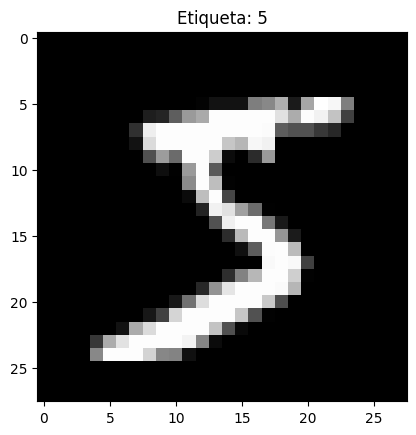

In [1]:
import numpy as np
import tensorflow as tf

(X_entreno, y_entreno), (X_prueba, y_prueba) = tf.keras.datasets.mnist.load_data()

# Imprimir cantidad de datos de entrenamiento y prueba
print(f"Datos de entrenamiento: {X_entreno.shape[0]}")
print(f"Datos de prueba: {X_prueba.shape[0]}")

# Mostrar forma de los datos
print(f"Forma de X_entreno: {X_entreno.shape}")
print(f"Forma de X_prueba: {X_prueba.shape}")

# Preprocesamiento: normalizar imágenes a rango [0, 1]
X_entreno = X_entreno.astype('float32') / 255.0
X_prueba = X_prueba.astype('float32') / 255.0

# Convertir etiquetas a one-hot encoding
y_entreno = tf.keras.utils.to_categorical(y_entreno, 10)
y_prueba = tf.keras.utils.to_categorical(y_prueba, 10)

# ejemplo de imagen y etiqueta
import matplotlib.pyplot as plt
plt.imshow(X_entreno[0], cmap='gray')
plt.title(f"Etiqueta: {np.argmax(y_entreno[0])}")
plt.show()

In [2]:
#Codigo para ejercicio 11, pero se ira graficando en cada modelo
from tensorflow import keras
from tensorflow.keras import layers

def visualizar_filtros_primera_capa(model, num_filtros=10):
    # Obtiene la primera capa densa
    primera_capa = None
    for layer in model.layers:
        if isinstance(layer, keras.layers.Dense):
            primera_capa = layer
            break
    if primera_capa is None:
        print("No se encontró una capa Dense en el modelo.")
        return
    
    pesos, biases = primera_capa.get_weights()
    print(f"Pesos forma: {pesos.shape} (entrada x neuronas)")

    # Mostrar pesos de los primeros 'num_filtros' neuronas
    plt.figure(figsize=(15, 3))
    for i in range(min(num_filtros, pesos.shape[1])):
        plt.subplot(1, num_filtros, i+1)
        filtro = pesos[:, i].reshape(28, 28)  # suponiendo entrada 28x28
        plt.imshow(filtro, cmap='viridis')
        plt.axis('off')
        plt.title(f'Filtro {i+1}')
    plt.show()

## 1. Modificación del Ancho de la Red (8 puntos)
- Modifique el tamaño de la capa escondida a 200 neuronas.
- Experimente con diferentes tamaños de capa escondida (50, 100, 300, 500) y determine
cuál ofrece el mejor rendimiento

1. ¿Cómo cambia la precisión de validación del modelo?

2. ¿Cuánto tiempo tarda el algoritmo en entrenar?



c:\Users\diego\OneDrive\Escritorio\2025\Semestre VIII\DataScience\tf2-env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Capa escondida: 50 neuronas
  Precisión de validación final: 0.9617
  Pérdida de validación final: 0.1258
----------------------------------------
Pesos forma: (784, 50) (entrada x neuronas)


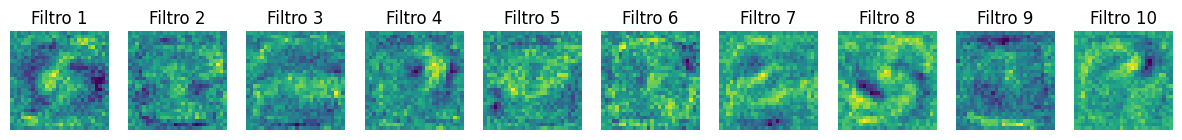

Capa escondida: 100 neuronas
  Precisión de validación final: 0.9723
  Pérdida de validación final: 0.1002
----------------------------------------
Pesos forma: (784, 100) (entrada x neuronas)


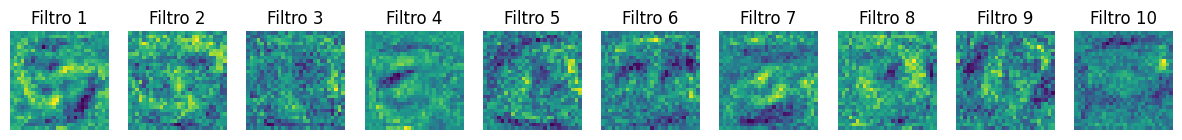

Capa escondida: 200 neuronas
  Precisión de validación final: 0.9739
  Pérdida de validación final: 0.0834
----------------------------------------
Pesos forma: (784, 200) (entrada x neuronas)


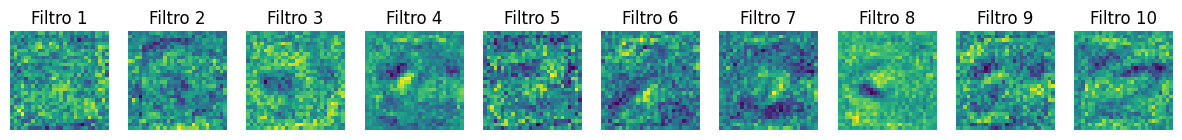

Capa escondida: 300 neuronas
  Precisión de validación final: 0.9785
  Pérdida de validación final: 0.0699
----------------------------------------
Pesos forma: (784, 300) (entrada x neuronas)


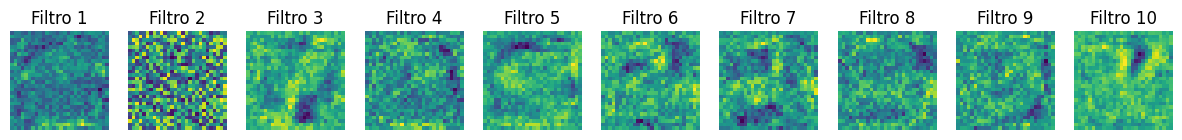

Capa escondida: 500 neuronas
  Precisión de validación final: 0.9782
  Pérdida de validación final: 0.0698
----------------------------------------
Pesos forma: (784, 500) (entrada x neuronas)


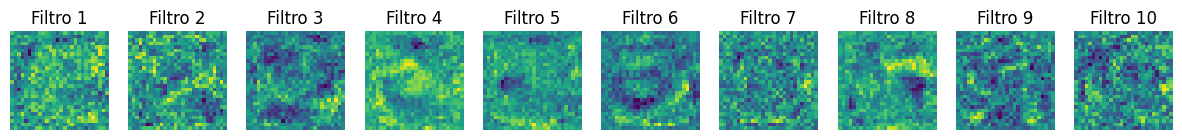

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

# crear y entrenar el modelo con diferente tamaño de capa escondida
def entrenar_modelo(hidden_units): 
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(hidden_units, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(X_entreno, y_entreno, epochs=5, batch_size=128, 
                        validation_data=(X_prueba, y_prueba), verbose=0)
    
    val_acc = history.history['val_accuracy'][-1]
    val_loss = history.history['val_loss'][-1]
    
    print(f"Capa escondida: {hidden_units} neuronas")
    print(f"  Precisión de validación final: {val_acc:.4f}")
    print(f"  Pérdida de validación final: {val_loss:.4f}")
    print("-" * 40)
    
    return history, model

histories = []
etiquetas = []

# Probar diferentes tamaños de capa escondida
for unidades in [50, 100, 200, 300, 500]:
    hist, model = entrenar_modelo(unidades)
    visualizar_filtros_primera_capa(model)
    histories.append(hist)
    etiquetas.append(f"{unidades} neuronas")


### 1. ¿Cómo cambia la precisión de validación del modelo?

- La precisión mejora consistentemente al aumentar el número de neuronas, especialmente de 50 a 300.
- A partir de 300 neuronas, la mejora es mínima o se estabiliza (ej: 300 y 500 tienen resultados similares).
- El punto de mejor rendimiento en tu prueba fue con 300 neuronas (97.85%).

### 2. ¿Cuánto tiempo tarda el algoritmo en entrenar?

A mayor número de neuronas, mayor tiempo de entrenamiento debido al incremento en parámetros. Cada uno se tardo menos de 15 segundos, tomando mas tiempo a mayor número de neuronas.

## 2. Modificación de la Profundidad de la Red
Agregue una capa escondida adicional al modelo.
- Documente cuidadosamente las dimensiones de los pesos y sesgos
- Compare la precisión de validación con el modelo original

1. Analice el impacto en el tiempo de ejecución
2. Explique los cambios necesarios en el código para implementar esta modificación

Capas escondidas: 100 y 50 neuronas
  Precisión de validación final: 0.9751
  Pérdida de validación final: 0.0832
----------------------------------------
Capa 1: pesos (784, 100), sesgos (100,)
Capa 2: pesos (100, 50), sesgos (50,)
Capa 3: pesos (50, 10), sesgos (10,)
----------------------------------------
Pesos forma: (784, 100) (entrada x neuronas)


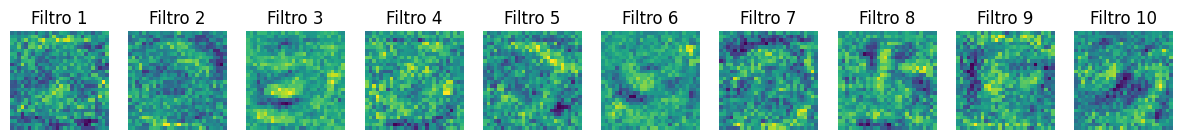

Capas escondidas: 200 y 100 neuronas
  Precisión de validación final: 0.9768
  Pérdida de validación final: 0.0765
----------------------------------------
Capa 1: pesos (784, 200), sesgos (200,)
Capa 2: pesos (200, 100), sesgos (100,)
Capa 3: pesos (100, 10), sesgos (10,)
----------------------------------------
Pesos forma: (784, 200) (entrada x neuronas)


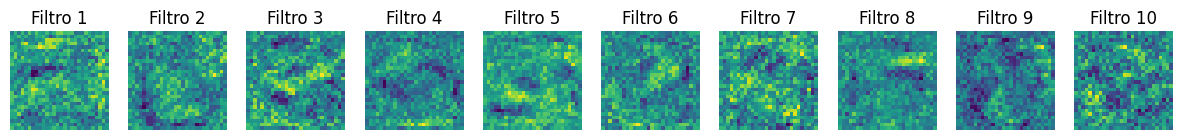

Capas escondidas: 300 y 150 neuronas
  Precisión de validación final: 0.9798
  Pérdida de validación final: 0.0642
----------------------------------------
Capa 1: pesos (784, 300), sesgos (300,)
Capa 2: pesos (300, 150), sesgos (150,)
Capa 3: pesos (150, 10), sesgos (10,)
----------------------------------------
Pesos forma: (784, 300) (entrada x neuronas)


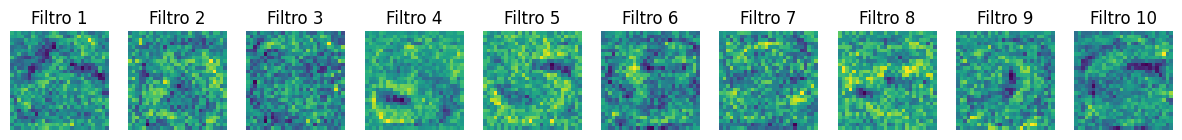

Capas escondidas: 500 y 200 neuronas
  Precisión de validación final: 0.9777
  Pérdida de validación final: 0.0761
----------------------------------------
Capa 1: pesos (784, 500), sesgos (500,)
Capa 2: pesos (500, 200), sesgos (200,)
Capa 3: pesos (200, 10), sesgos (10,)
----------------------------------------
Pesos forma: (784, 500) (entrada x neuronas)


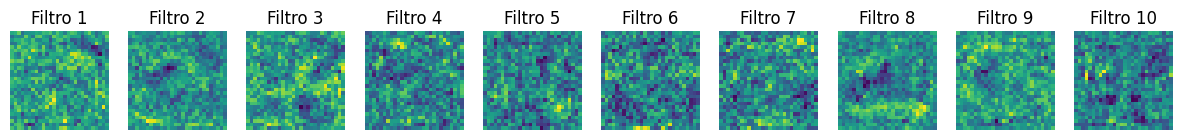

In [4]:
def entrenar_modelo2c(hidden_units1, hidden_units2):
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(hidden_units1, activation='relu'),
        layers.Dense(hidden_units2, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(X_entreno, y_entreno, epochs=5, batch_size=128,
                        validation_data=(X_prueba, y_prueba), verbose=0)
    
    val_acc = history.history['val_accuracy'][-1]
    val_loss = history.history['val_loss'][-1]

    print(f"Capas escondidas: {hidden_units1} y {hidden_units2} neuronas")
    print(f"  Precisión de validación final: {val_acc:.4f}")
    print(f"  Pérdida de validación final: {val_loss:.4f}")
    print("-" * 40)
    
    # Dimensiones de pesos y sesgos
    for i, layer in enumerate(model.layers):
        if hasattr(layer, 'weights') and layer.get_weights():
            pesos = layer.get_weights()[0].shape
            sesgos = layer.get_weights()[1].shape
            print(f"Capa {i}: pesos {pesos}, sesgos {sesgos}")
    print("-" * 40)
    
    return history, model

histories_2c = []
etiquetas_2c = []

# Varias combinaciones de tamaño de capas
combinaciones = [(100, 50), (200, 100), (300, 150), (500, 200)]

for h1, h2 in combinaciones:
    hist, model = entrenar_modelo2c(h1, h2)
    visualizar_filtros_primera_capa(model)
    histories_2c.append(hist)
    etiquetas_2c.append(f"{h1}-{h2}")

### 1. Impacto en la precisión
- En comparación con la arquitectura original de una sola capa, añadir una capa oculta mejora la precisión de validación ligeramente, especialmente con tamaños medianos.

- El mejor resultado se obtiene con 300 y 150 neuronas, alcanzando 97.98% de precisión.

### 2. Impacto en el tiempo de ejecución

El tiempo de ejecucion fue un poco más rápido que el modelo inicial 

### 3. Cambios realizados en el código

Se añadió una capa Dense(...) intermedia:

model = keras.Sequential([

    layers.Flatten(input_shape=(28, 28)),

    layers.Dense(hidden_units1, activation='relu'),  # Primera capa oculta

    layers.Dense(hidden_units2, activation='relu'),  # Nueva capa agregada

    layers.Dense(10, activation='softmax')           # Capa de salida
    
])

Además, se documentaron manualmente los pesos y sesgos por capa para analizar su dimensión.

## 3. Redes Profundas
Experimente con arquitecturas más profundas, llegando hasta 5 capas escondidas.
- Ajuste el ancho de cada capa según considere conveniente
- Documente la precisión de validación para cada configuración
- Analice la relación entre profundidad y tiempo de ejecución
- Identifique posibles problemas de desvanecimiento del gradiente

Arquitectura: [100] neuronas por capa
  Precisión de validación final: 0.9700
  Pérdida de validación final: 0.1020
  Tiempo de entrenamiento: 9.24 segundos
----------------------------------------
Capa 1: pesos (784, 100), sesgos (100,)
Capa 2: pesos (100, 10), sesgos (10,)
----------------------------------------
Pesos forma: (784, 100) (entrada x neuronas)


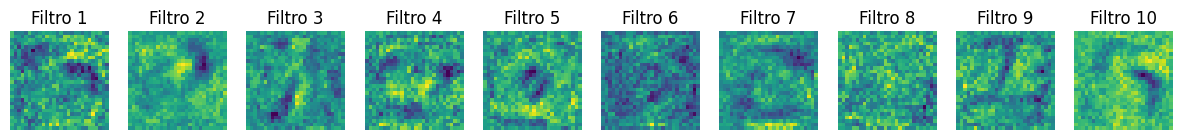

Arquitectura: [200, 100] neuronas por capa
  Precisión de validación final: 0.9742
  Pérdida de validación final: 0.0790
  Tiempo de entrenamiento: 16.21 segundos
----------------------------------------
Capa 1: pesos (784, 200), sesgos (200,)
Capa 2: pesos (200, 100), sesgos (100,)
Capa 3: pesos (100, 10), sesgos (10,)
----------------------------------------
Pesos forma: (784, 200) (entrada x neuronas)


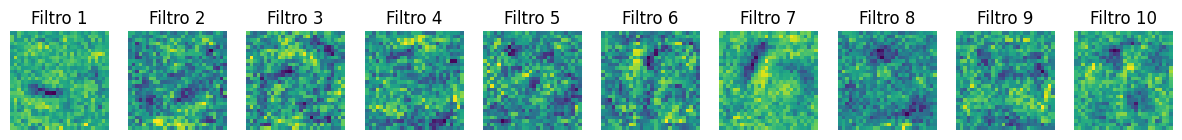

Arquitectura: [200, 150, 100] neuronas por capa
  Precisión de validación final: 0.9756
  Pérdida de validación final: 0.0785
  Tiempo de entrenamiento: 12.89 segundos
----------------------------------------
Capa 1: pesos (784, 200), sesgos (200,)
Capa 2: pesos (200, 150), sesgos (150,)
Capa 3: pesos (150, 100), sesgos (100,)
Capa 4: pesos (100, 10), sesgos (10,)
----------------------------------------
Pesos forma: (784, 200) (entrada x neuronas)


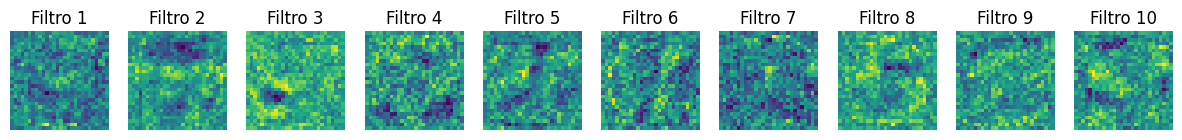

Arquitectura: [300, 200, 150, 100] neuronas por capa
  Precisión de validación final: 0.9784
  Pérdida de validación final: 0.0713
  Tiempo de entrenamiento: 17.22 segundos
----------------------------------------
Capa 1: pesos (784, 300), sesgos (300,)
Capa 2: pesos (300, 200), sesgos (200,)
Capa 3: pesos (200, 150), sesgos (150,)
Capa 4: pesos (150, 100), sesgos (100,)
Capa 5: pesos (100, 10), sesgos (10,)
----------------------------------------
Pesos forma: (784, 300) (entrada x neuronas)


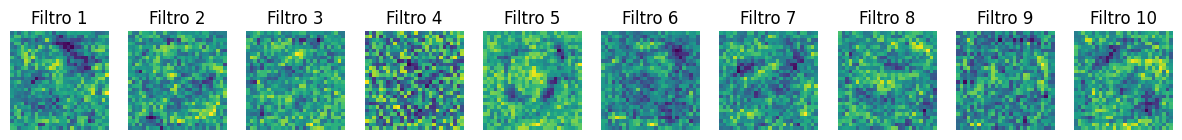

Arquitectura: [500, 400, 300, 200, 100] neuronas por capa
  Precisión de validación final: 0.9746
  Pérdida de validación final: 0.0922
  Tiempo de entrenamiento: 29.21 segundos
----------------------------------------
Capa 1: pesos (784, 500), sesgos (500,)
Capa 2: pesos (500, 400), sesgos (400,)
Capa 3: pesos (400, 300), sesgos (300,)
Capa 4: pesos (300, 200), sesgos (200,)
Capa 5: pesos (200, 100), sesgos (100,)
Capa 6: pesos (100, 10), sesgos (10,)
----------------------------------------
Pesos forma: (784, 500) (entrada x neuronas)


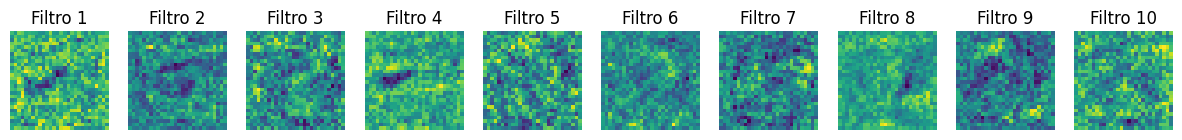

In [5]:
import time

# Función para entrenar modelos con hasta 5 capas escondidas
def entrenar_red(hidden_units_list):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    for units in hidden_units_list:
        model.add(layers.Dense(units, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    start = time.time()
    history = model.fit(X_entreno, y_entreno, epochs=5, batch_size=128,
                        validation_data=(X_prueba, y_prueba), verbose=0)
    end = time.time()

    val_acc = history.history['val_accuracy'][-1]
    val_loss = history.history['val_loss'][-1]

    print(f"Arquitectura: {hidden_units_list} neuronas por capa")
    print(f"  Precisión de validación final: {val_acc:.4f}")
    print(f"  Pérdida de validación final: {val_loss:.4f}")
    print(f"  Tiempo de entrenamiento: {end - start:.2f} segundos")
    print("-" * 40)

    # Dimensiones de pesos y sesgos
    for i, layer in enumerate(model.layers):
        if hasattr(layer, 'weights') and layer.get_weights():
            pesos = layer.get_weights()[0].shape
            sesgos = layer.get_weights()[1].shape
            print(f"Capa {i}: pesos {pesos}, sesgos {sesgos}")
    print("-" * 40)

    return history, model


# arquitecturas profundas
arquitecturas = [
    [100],
    [200, 100],
    [200, 150, 100],
    [300, 200, 150, 100],
    [500, 400, 300, 200, 100]
]


histories_3deep = []
etiquetas_3deep = []

for config in arquitecturas:
    hist, model = entrenar_red(config)
    visualizar_filtros_primera_capa(model)
    histories_3deep.append(hist)
    etiquetas_3deep.append("-".join(map(str, config)))

    

### Análisis

- El tiempo de ejecución crece con la cantidad de capas y neuronas, como era de esperarse.

- Arquitecturas más profundas no siempre son mejores: la red con 5 capas es más lenta y no mejora la precisión respecto a una red de 3–4 capas.

- El modelo de 4 capas alcanza el mejor balance entre precisión y tiempo.

### Posibles problemas de Desvanecimiento del Gradiente

- La red de 5 capas aumenta en complejidad, pero su rendimiento empeora ligeramente (0.9746 frente a 0.9784 de la red de 4 capas).

- La pérdida de validación aumenta de nuevo, a pesar de tener más capacidad de representación.

El desvanecimiento del gradiente ocurre cuando los gradientes se vuelven muy pequeños durante el backpropagation.

## 4. Funciones de Activación I 
Aplique la función de activación sigmoidal a todas las capas.
- Compare el rendimiento con las activaciones originales
- Analice el impacto en la velocidad de convergencia


Comparando para 50 neuronas en la capa escondida:
[ReLU] 50 neuronas - Precisión: 0.9631 - Pérdida: 0.1278 - Tiempo: 9.11s
Pesos forma: (784, 50) (entrada x neuronas)


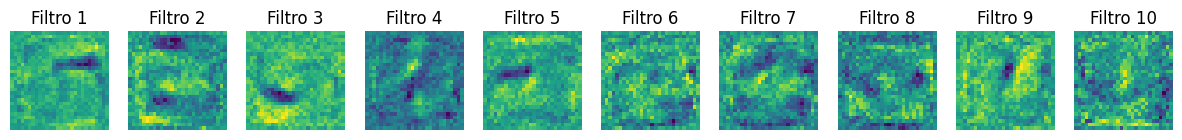

[Sigmoide] 50 neuronas - Precisión: 0.9437 - Pérdida: 0.1944 - Tiempo: 6.93s
Pesos forma: (784, 50) (entrada x neuronas)


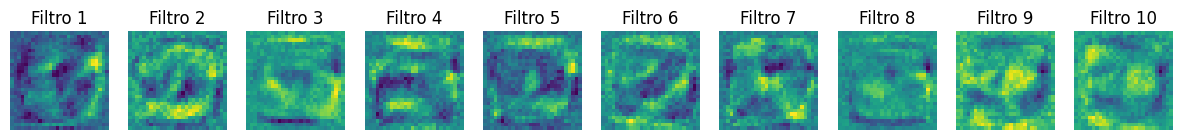


Comparando para 100 neuronas en la capa escondida:
[ReLU] 100 neuronas - Precisión: 0.9710 - Pérdida: 0.0981 - Tiempo: 8.71s
Pesos forma: (784, 100) (entrada x neuronas)


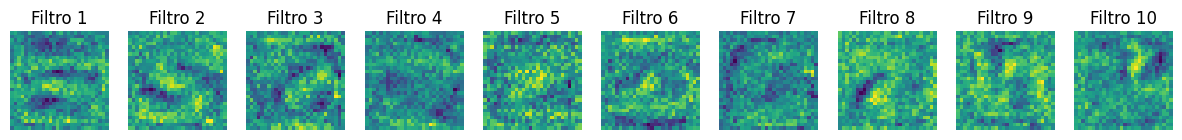

[Sigmoide] 100 neuronas - Precisión: 0.9511 - Pérdida: 0.1632 - Tiempo: 11.05s
Pesos forma: (784, 100) (entrada x neuronas)


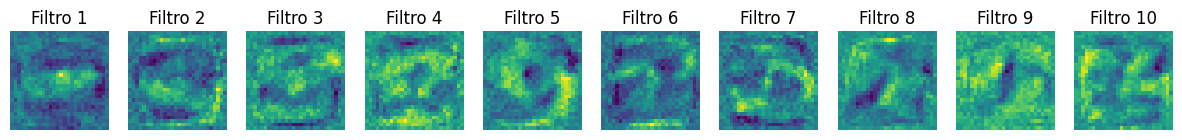


Comparando para 200 neuronas en la capa escondida:
[ReLU] 200 neuronas - Precisión: 0.9739 - Pérdida: 0.0821 - Tiempo: 22.34s
Pesos forma: (784, 200) (entrada x neuronas)


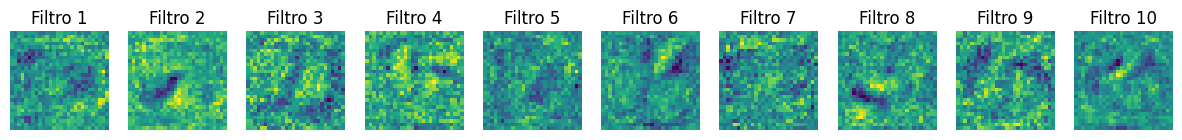

[Sigmoide] 200 neuronas - Precisión: 0.9573 - Pérdida: 0.1433 - Tiempo: 26.71s
Pesos forma: (784, 200) (entrada x neuronas)


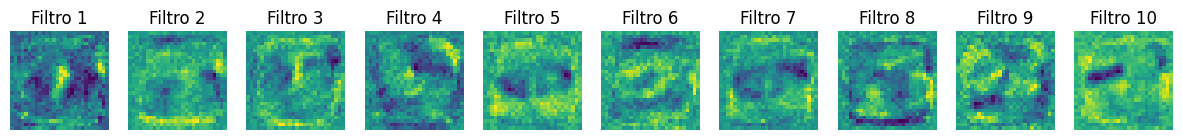


Comparando para 300 neuronas en la capa escondida:
[ReLU] 300 neuronas - Precisión: 0.9784 - Pérdida: 0.0699 - Tiempo: 32.10s
Pesos forma: (784, 300) (entrada x neuronas)


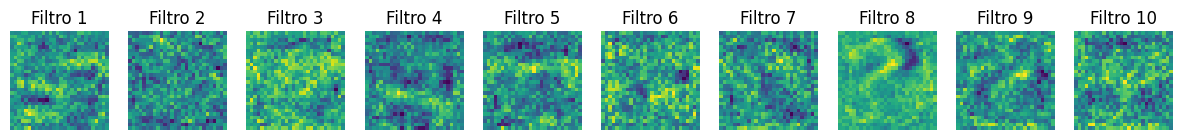

[Sigmoide] 300 neuronas - Precisión: 0.9602 - Pérdida: 0.1325 - Tiempo: 32.06s
Pesos forma: (784, 300) (entrada x neuronas)


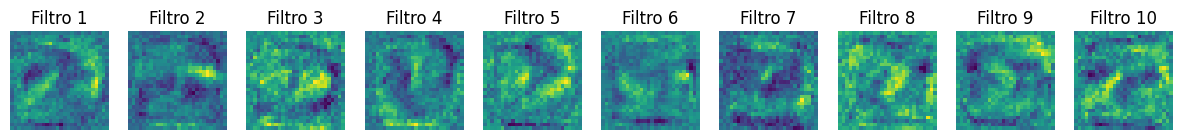


Comparando para 500 neuronas en la capa escondida:
[ReLU] 500 neuronas - Precisión: 0.9812 - Pérdida: 0.0631 - Tiempo: 39.73s
Pesos forma: (784, 500) (entrada x neuronas)


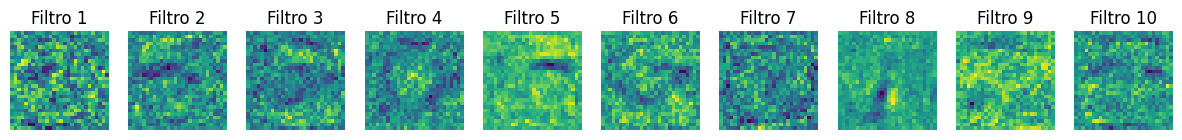

[Sigmoide] 500 neuronas - Precisión: 0.9618 - Pérdida: 0.1309 - Tiempo: 36.31s
Pesos forma: (784, 500) (entrada x neuronas)


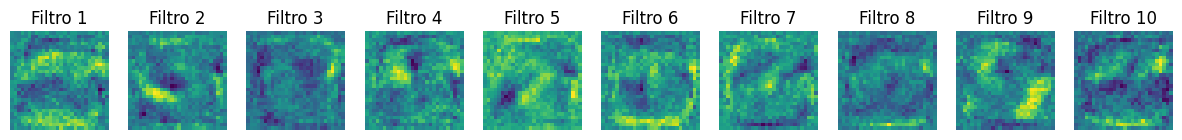

In [6]:
def entrenar_relu(hidden_units):
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(hidden_units, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    start = time.time()
    history = model.fit(X_entreno, y_entreno, epochs=5, batch_size=128,
                        validation_data=(X_prueba, y_prueba), verbose=0)
    end = time.time()
    
    val_acc = history.history['val_accuracy'][-1]
    val_loss = history.history['val_loss'][-1]
    print(f"[ReLU] {hidden_units} neuronas - Precisión: {val_acc:.4f} - Pérdida: {val_loss:.4f} - Tiempo: {end-start:.2f}s")
    return history, model

def entrenar_sigmoide(hidden_units):
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(hidden_units, activation='sigmoid'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    start = time.time()
    history = model.fit(X_entreno, y_entreno, epochs=5, batch_size=128,
                        validation_data=(X_prueba, y_prueba), verbose=0)
    end = time.time()
    
    val_acc = history.history['val_accuracy'][-1]
    val_loss = history.history['val_loss'][-1]
    print(f"[Sigmoide] {hidden_units} neuronas - Precisión: {val_acc:.4f} - Pérdida: {val_loss:.4f} - Tiempo: {end-start:.2f}s")
    return history, model


histories_activacion = []
etiquetas_activacion = []

for unidades in [50, 100, 200, 300, 500]:
    print(f"\nComparando para {unidades} neuronas en la capa escondida:")
    
    hist_relu, model_relu = entrenar_relu(unidades)
    histories_activacion.append(hist_relu)
    etiquetas_activacion.append(f"ReLU-{unidades}")
    visualizar_filtros_primera_capa(model_relu)
    
    hist_sigmoid, model_sigmoid = entrenar_sigmoide(unidades)
    histories_activacion.append(hist_sigmoid)
    etiquetas_activacion.append(f"Sigmoid-{unidades}")
    visualizar_filtros_primera_capa(model_sigmoid)
    

### Análisis

- En todos los casos, la activación ReLU supera a Sigmoide tanto en precisión como en pérdida.

- La diferencia es de más de 1.5–2.0% en precisión para arquitecturas medianas y grandes.

- La función ReLU es significativamente mejor para redes profundas y grandes, ya que ascelera la convergencia, mejora la precisión final y evita problemas de desvanecimiento del gradiente.

- La función sigmoide es más útil en capas de salida

## 5. Funciones de Activación II 
Aplique ReLU a la primera capa escondida y tanh a la segunda
- Compare el rendimiento con las configuraciones anteriores
- Explique las ventajas y desventajas de cada función de activación


Comparando para 200 y 100 neuronas:
[ReLU-Tanh] 200 y 100 neuronas - Precisión: 0.9789 - Pérdida: 0.0669 - Tiempo: 37.05s
----------------------------------------
Pesos forma: (784, 200) (entrada x neuronas)


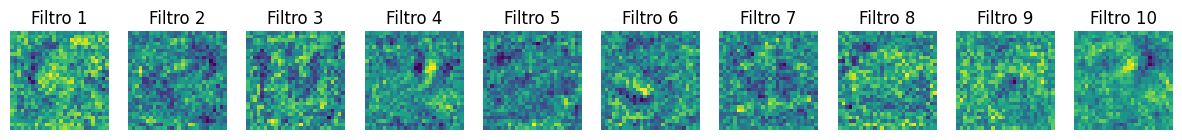


Comparando para 300 y 200 neuronas:
[ReLU-Tanh] 300 y 200 neuronas - Precisión: 0.9788 - Pérdida: 0.0689 - Tiempo: 45.92s
----------------------------------------
Pesos forma: (784, 300) (entrada x neuronas)


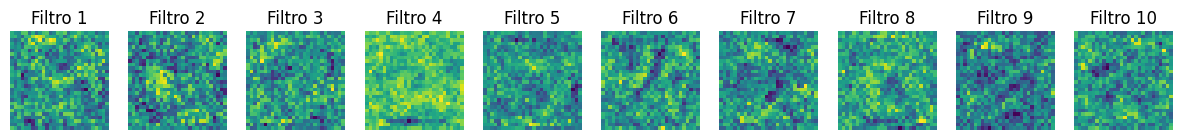


Comparando para 500 y 300 neuronas:
[ReLU-Tanh] 500 y 300 neuronas - Precisión: 0.9764 - Pérdida: 0.0841 - Tiempo: 62.63s
----------------------------------------
Pesos forma: (784, 500) (entrada x neuronas)


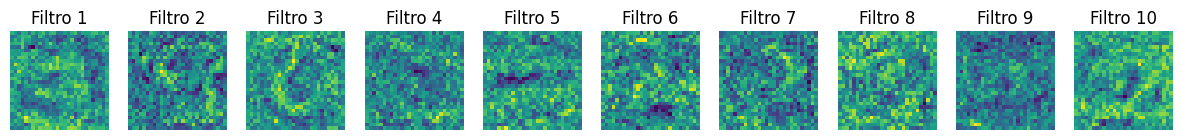


Comparando para 500 y 500 neuronas:
[ReLU-Tanh] 500 y 500 neuronas - Precisión: 0.9698 - Pérdida: 0.1111 - Tiempo: 54.77s
----------------------------------------
Pesos forma: (784, 500) (entrada x neuronas)


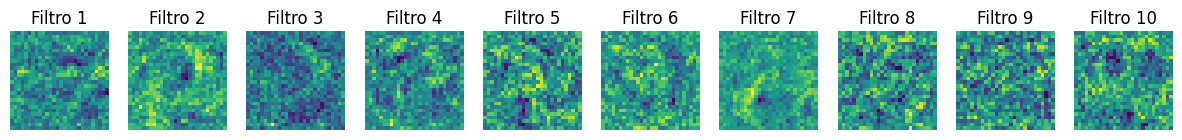

In [7]:
# Modelo con ReLU en la primera capa escondida y tanh en la segunda
def ReLU_tanh(hidden_units1, hidden_units2):
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(hidden_units1, activation='relu'),
        layers.Dense(hidden_units2, activation='tanh'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    start = time.time()
    history = model.fit(X_entreno, y_entreno, epochs=5, batch_size=128,
                        validation_data=(X_prueba, y_prueba), verbose=0)
    end = time.time()

    val_acc = history.history['val_accuracy'][-1]
    val_loss = history.history['val_loss'][-1]

    print(f"[ReLU-Tanh] {hidden_units1} y {hidden_units2} neuronas - Precisión: {val_acc:.4f} - Pérdida: {val_loss:.4f} - Tiempo: {end-start:.2f}s")
    print("-" * 40)

    return history, model


# Comparar con diferentes cantidades de neuronas
configs = [(200, 100), (300, 200), (500, 300), (500, 500)]

histories_relu_tanh = []
etiquetas_relu_tanh = []

for h1, h2 in configs:
    print(f"\nComparando para {h1} y {h2} neuronas:")
    hist, model = ReLU_tanh(h1, h2)
    visualizar_filtros_primera_capa(model)
    histories_relu_tanh.append(hist)
    etiquetas_relu_tanh.append(f"ReLU-Tanh {h1}-{h2}")

### Análisis 

#### Ventajas
- ReLU ayuda a una convergencia más rápida y eficiente.

- Tanh proporciona activaciones centradas en cero, lo que puede ayudar a estabilizar las actualizaciones de gradiente en capas posteriores.

- Tiene un rendimiento muy bueno: el modelo con (200, 100) neuronas y activación ReLU + Tanh logró mejor precisión que ReLU puro en esa misma arquitectura.

#### Desventajas
- Tanh, aunque mejor que sigmoid, aún puede sufrir saturación si recibe valores muy grandes (aunque menos grave si va después de ReLU).

- El entrenamiento es ligeramente más lento que con ReLU puro en configuraciones más grandes.

- Para arquitecturas muy grandes como (500, 500), el rendimiento cae, lo cual puede deberse a saturación o desajustes de escala entre capas.

### Comparación de Funciones de Activación

#### ReLU (Rectified Linear Unit)
##### Rendimiento

Consistentemente alcanza precisiones superiores al 97% a partir de 100 neuronas.

Mejora con el número de neuronas:

- 100 → 0.9710

- 200 → 0.9739

- 300 → 0.9784

- 500 → 0.9812 (mejor)

##### Velocidad

Entrenamiento rápido.

##### Ventajas

- No sufre saturación.

- Computacionalmente eficiente.

- Facilita la propagación del gradiente.

##### Desventajas

- Puede haber neuronas muertas.

#### Sigmoid
##### Rendimiento

Inferior a ReLU:

- 100 neuronas → 0.9511

- 200 neuronas → 0.9573

- 300 neuronas → 0.9602

- 500 neuronas → 0.9618

##### Velocidad

Más lento que ReLU para el mismo número de neuronas.

##### Desventajas

- Sufre saturación.

- No está centrado en cero.

#### ReLU en primera capa + Tanh en segunda capa
##### Rendimiento

Comparable a ReLU y aveces superior:

- (200, 100) → 0.9789

- (300, 200) → 0.9788

- (500, 300) → 0.9764

- (500, 500) → 0.9698

##### Velocidad

Más lento que ReLU puro pero más rápido que sigmoid puro.

##### Ventajas

- Tanh está centrado en cero

- Puede actuar como una forma de regularización suave.

##### Desventajas

- Tanh puede saturarse si recibe valores grandes (aunque ReLU en la capa anterior ayuda a mitigarlo).

- No mejora significativamente sobre ReLU puro en arquitecturas grandes.

### 6. Tamaño de Batch Grande
Modifique el tamaño de batch a 10,000.
- Documente el cambio en el tiempo de entrenamiento
- Analice el impacto en la precisión del modelo
- Explique teóricamente por qué se observan estos cambios

Batch size: 10000 | Neuronas: 200
  Precisión de validación final: 0.8979
  Pérdida de validación final: 0.3837
  Tiempo de entrenamiento: 6.93 segundos
----------------------------------------
Pesos forma: (784, 200) (entrada x neuronas)


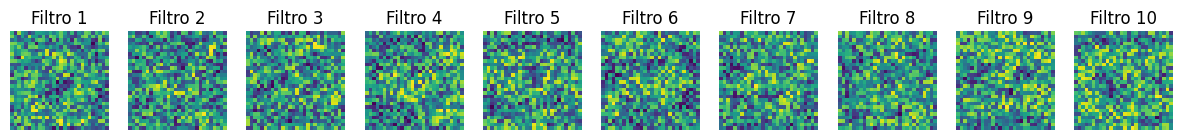

Batch size: 10000 | Neuronas: 500
  Precisión de validación final: 0.9106
  Pérdida de validación final: 0.3226
  Tiempo de entrenamiento: 14.04 segundos
----------------------------------------
Pesos forma: (784, 500) (entrada x neuronas)


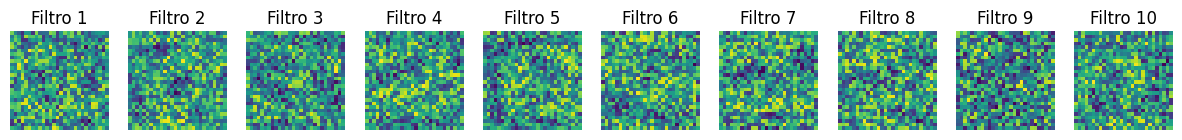

Batch size: 10000 | Neuronas: 1000
  Precisión de validación final: 0.9226
  Pérdida de validación final: 0.2695
  Tiempo de entrenamiento: 20.63 segundos
----------------------------------------
Pesos forma: (784, 1000) (entrada x neuronas)


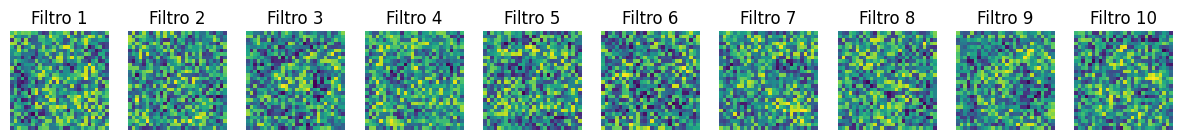

In [8]:
def entrenar_batch_grande(hidden_units, batch_size=10000):
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(hidden_units, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    start = time.time()
    history = model.fit(X_entreno, y_entreno, epochs=5, batch_size=batch_size,
                        validation_data=(X_prueba, y_prueba), verbose=0)
    end = time.time()

    val_acc = history.history['val_accuracy'][-1]
    val_loss = history.history['val_loss'][-1]

    print(f"Batch size: {batch_size} | Neuronas: {hidden_units}")
    print(f"  Precisión de validación final: {val_acc:.4f}")
    print(f"  Pérdida de validación final: {val_loss:.4f}")
    print(f"  Tiempo de entrenamiento: {end - start:.2f} segundos")
    print("-" * 40)

    return history, model

hidden_sizes = [200, 500, 1000]

histories_batch = []
etiquetas_batch = []

for size in hidden_sizes:
    hist, model = entrenar_batch_grande(size, batch_size=10000)
    visualizar_filtros_primera_capa(model)
    histories_batch.append(hist)
    etiquetas_batch.append(f"Batch10000-{size}")

#### Análisis de Impacto
1. Tiempo de entrenamiento
- Menor número de actualizaciones 

- El tiempo aumenta con el tamaño del modelo (más neuronas → más parámetros), pero sigue siendo más eficiente por época comparado con tamaños de batch pequeños.

2. Precisión del modelo
Significativamente más baja que usando batches pequeños/medianos, esto nos indica que el modelo generaliza peor con batches muy grandes.

#### Explicación Teórica
Usar un batch grande hace que el modelo actualice sus pesos con menos frecuencia, ya que procesa muchos datos a la vez para calcular el gradiente. Esto reduce el tiempo de entrenamiento por época y permite aprovechar mejor el poder de cómputo de la GPU, haciendo el proceso más eficiente.

Sin embargo, esto también puede afectar negativamente la precisión. Al tener menos actualizaciones y menos "ruido" en los datos, el modelo tiende a converger hacia soluciones más estables pero que no generalizan tan bien a nuevos datos. En otras palabras, el modelo aprende de forma más conservadora, lo que puede limitar su capacidad para ajustarse bien al conjunto de prueba. Por eso, aunque el entrenamiento es más rápido, el rendimiento final puede ser un poco más bajo.

### 7. Descenso de Gradiente Estocástico (SGD)
Ajuste el tamaño de batch a 1 (SGD puro).
- Compare el tiempo de ejecución con configuraciones anteriores
- Analice la estabilidad y precisión del entrenamiento
- Explique si los resultados son coherentes con la teoría

Batch size: 1 | Neuronas: 200
  Precisión de validación final: 0.9743
  Pérdida de validación final: 0.1691
  Tiempo de entrenamiento: 1606.68 segundos
----------------------------------------
Pesos forma: (784, 200) (entrada x neuronas)


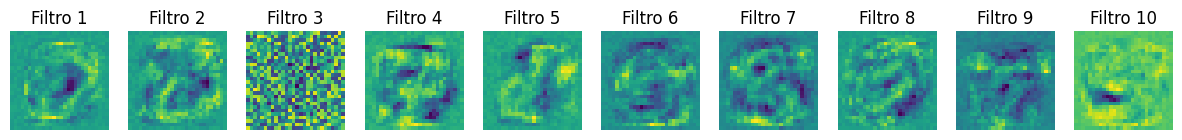

Batch size: 1 | Neuronas: 500
  Precisión de validación final: 0.9756
  Pérdida de validación final: 0.1977
  Tiempo de entrenamiento: 2117.67 segundos
----------------------------------------
Pesos forma: (784, 500) (entrada x neuronas)


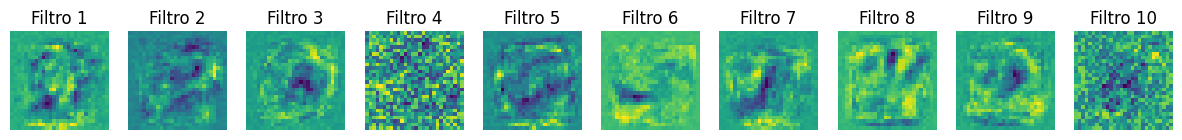

Batch size: 1 | Neuronas: 1000
  Precisión de validación final: 0.9711
  Pérdida de validación final: 0.3187
  Tiempo de entrenamiento: 2707.19 segundos
----------------------------------------
Pesos forma: (784, 1000) (entrada x neuronas)


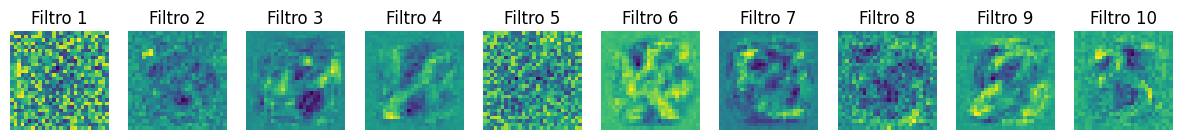

In [9]:
def entrenar_sgd(hidden_units, batch_size=1):
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(hidden_units, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    start = time.time()
    history = model.fit(X_entreno, y_entreno, epochs=5, batch_size=batch_size,
                        validation_data=(X_prueba, y_prueba), verbose=0)
    end = time.time()

    val_acc = history.history['val_accuracy'][-1]
    val_loss = history.history['val_loss'][-1]

    print(f"Batch size: {batch_size} | Neuronas: {hidden_units}")
    print(f"  Precisión de validación final: {val_acc:.4f}")
    print(f"  Pérdida de validación final: {val_loss:.4f}")
    print(f"  Tiempo de entrenamiento: {end - start:.2f} segundos")
    print("-" * 40)

    return history, model


sgd_neuronas = [200, 500, 1000]
histories_sgd = []
etiquetas_sgd = []

for size in sgd_neuronas:
    hist, model = entrenar_sgd(size, batch_size=1)
    visualizar_filtros_primera_capa(model)
    histories_sgd.append(hist)
    etiquetas_sgd.append(f"SGD-{size}")

### 8. Tasa de Aprendizaje Baja
Modifique la tasa de aprendizaje a 0.0001.
- Documente el impacto en la convergencia del modelo
- Analice si el modelo alcanza mejor precisión o se queda atrapado en mínimos locales

Tasa de aprendizaje: 0.0001 | Neuronas: 200
  Precisión de validación final: 0.9404
  Pérdida de validación final: 0.2155
  Tiempo de entrenamiento: 32.22 segundos
----------------------------------------
Pesos forma: (784, 200) (entrada x neuronas)


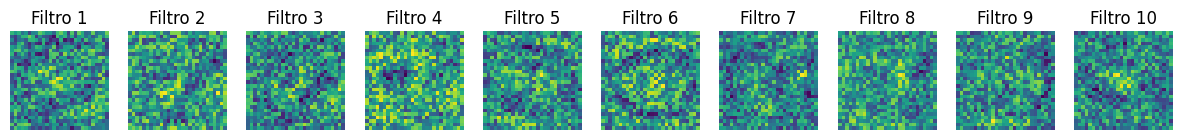

Tasa de aprendizaje: 0.0001 | Neuronas: 500
  Precisión de validación final: 0.9499
  Pérdida de validación final: 0.1714
  Tiempo de entrenamiento: 35.36 segundos
----------------------------------------
Pesos forma: (784, 500) (entrada x neuronas)


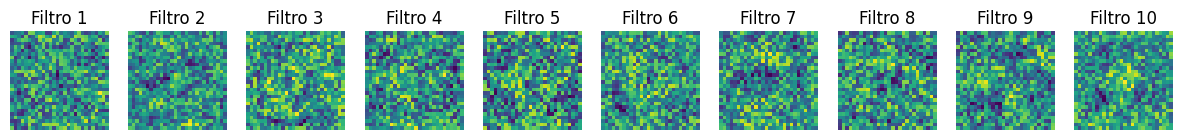

Tasa de aprendizaje: 0.0001 | Neuronas: 1000
  Precisión de validación final: 0.9596
  Pérdida de validación final: 0.1402
  Tiempo de entrenamiento: 51.24 segundos
----------------------------------------
Pesos forma: (784, 1000) (entrada x neuronas)


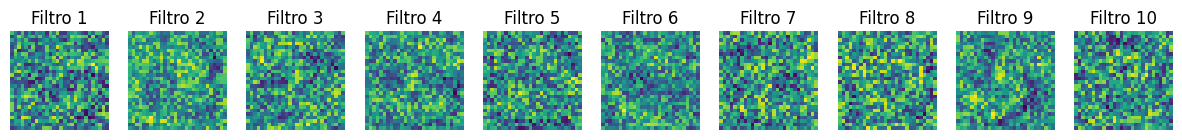

In [10]:
def entrenar_lr_bajo(hidden_units, lr=0.0001):
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(hidden_units, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    optimizer = keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    start = time.time()
    history = model.fit(X_entreno, y_entreno, epochs=5, batch_size=128,
                        validation_data=(X_prueba, y_prueba), verbose=0)
    end = time.time()

    val_acc = history.history['val_accuracy'][-1]
    val_loss = history.history['val_loss'][-1]

    print(f"Tasa de aprendizaje: {lr} | Neuronas: {hidden_units}")
    print(f"  Precisión de validación final: {val_acc:.4f}")
    print(f"  Pérdida de validación final: {val_loss:.4f}")
    print(f"  Tiempo de entrenamiento: {end - start:.2f} segundos")
    print("-" * 40)

    return history, model


histories_lr_bajo = []
etiquetas_lr_bajo = []

for size in [200, 500, 1000]:
    hist, model = entrenar_lr_bajo(size, lr=0.0001)
    visualizar_filtros_primera_capa(model)
    histories_lr_bajo.append(hist)
    etiquetas_lr_bajo.append(f"LR0.0001-{size}")

#### Análisis 

Cuando se usa una tasa de aprendizaje baja como 0.0001, el modelo avanza muy lentamente al ajustar los pesos. Esto hace que el entrenamiento sea más estable y menos propenso a saltarse buenos mínimos, pero también significa que puede tardar más en llegar a una solución óptima.

En los resultados se nota que la precisión mejora ligeramente a medida que se aumentan las neuronas, pero sigue siendo menor en comparación con una tasa de aprendizaje más estándar. Esto indica que el modelo no está alcanzando su máximo potencial en solo 5 épocas: le falta tiempo para converger por completo.

Además, una tasa tan baja puede hacer que el modelo se quede atrapado en mínimos locales, especialmente si no se entrena por más épocas. Es decir, aunque es más seguro, también puede ser menos eficiente si no se ajusta bien el número de épocas.

### 9. Tasa de Aprendizaje Alta 
Ajuste la tasa de aprendizaje a 0.02.
- Documente el impacto en la estabilidad del entrenamiento
- Analice si se produce divergencia o mejora en la velocidad de convergencia

Tasa de aprendizaje: 0.02 | Neuronas: 200
  Precisión de validación final: 0.9625
  Pérdida de validación final: 0.1774
  Tiempo de entrenamiento: 27.10 segundos
----------------------------------------
Pesos forma: (784, 200) (entrada x neuronas)


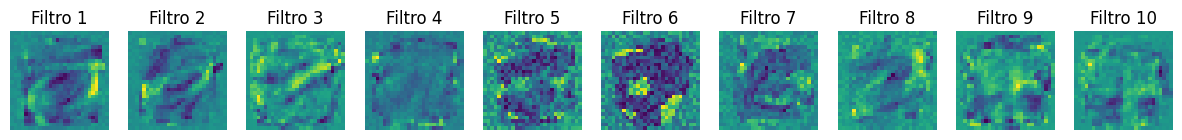

Tasa de aprendizaje: 0.02 | Neuronas: 500
  Precisión de validación final: 0.9600
  Pérdida de validación final: 0.1820
  Tiempo de entrenamiento: 45.52 segundos
----------------------------------------
Pesos forma: (784, 500) (entrada x neuronas)


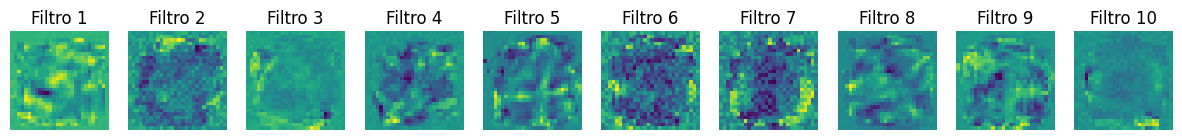

Tasa de aprendizaje: 0.02 | Neuronas: 1000
  Precisión de validación final: 0.9565
  Pérdida de validación final: 0.2042
  Tiempo de entrenamiento: 63.93 segundos
----------------------------------------
Pesos forma: (784, 1000) (entrada x neuronas)


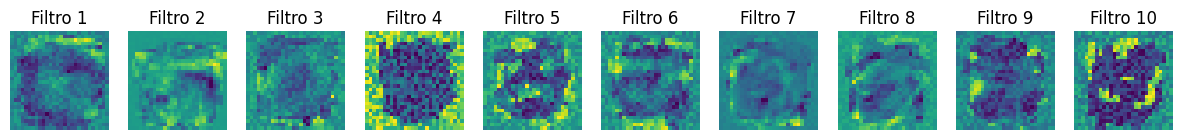

In [11]:
def entrenar_lr_alta(hidden_units, lr=0.02):
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(hidden_units, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    optimizer = keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    start = time.time()
    history = model.fit(X_entreno, y_entreno, epochs=5, batch_size=128,
                        validation_data=(X_prueba, y_prueba), verbose=0)
    end = time.time()

    val_acc = history.history['val_accuracy'][-1]
    val_loss = history.history['val_loss'][-1]

    print(f"Tasa de aprendizaje: {lr} | Neuronas: {hidden_units}")
    print(f"  Precisión de validación final: {val_acc:.4f}")
    print(f"  Pérdida de validación final: {val_loss:.4f}")
    print(f"  Tiempo de entrenamiento: {end - start:.2f} segundos")
    print("-" * 40)

    return history, model


histories_lr_alta = []
etiquetas_lr_alta = []

for size in [200, 500, 1000]:
    hist, model = entrenar_lr_alta(size, lr=0.02)
    visualizar_filtros_primera_capa(model)
    histories_lr_alta.append(hist)
    etiquetas_lr_alta.append(f"LR0.02-{size}")


#### Análisis 

Al usar una tasa de aprendizaje alta como 0.02, el modelo puede ajustar los pesos más rápido, lo que acelera la convergencia en algunas etapas. Sin embargo, esto también puede hacer que el entrenamiento sea menos estable, causando fluctuaciones en la pérdida y la precisión.

En los resultados, la precisión no mejora mucho respecto a tasas más bajas y la pérdida es más alta, lo que indica que el modelo puede estar dando saltos grandes en el espacio de parámetros y no afinando bien. Aunque no hay una divergencia total, el entrenamiento no es tan suave ni confiable.

En resumen, la tasa alta ayuda a que el entrenamiento sea más rápido, pero a costa de menor estabilidad y riesgo de que el modelo no alcance la mejor precisión posible en pocas épocas.

### 10. Optimización Avanzada (10 puntos)
Implemente técnicas de regularización:
- Agregue dropout entre capas (pruebe diferentes tasas)
- Experimente con regularización L2
- Documente el impacto en la generalización del modelo

Dropout: 0.3 | L2: 0.0000 | Neuronas: 200
  Precisión entrenamiento final: 0.9725
  Precisión validación final:  0.9769
  Pérdida validación final:    0.0745
  Tiempo de entrenamiento:     42.16 segundos
--------------------------------------------------
Pesos forma: (784, 200) (entrada x neuronas)


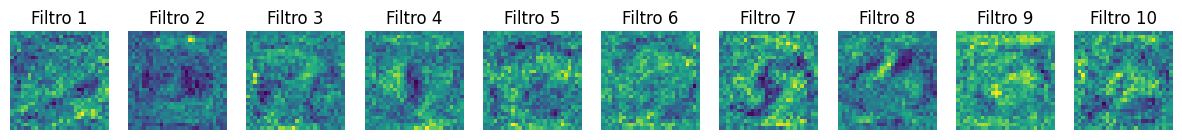

Dropout: 0.3 | L2: 0.0010 | Neuronas: 200
  Precisión entrenamiento final: 0.9608
  Precisión validación final:  0.9708
  Pérdida validación final:    0.1780
  Tiempo de entrenamiento:     44.29 segundos
--------------------------------------------------
Pesos forma: (784, 200) (entrada x neuronas)


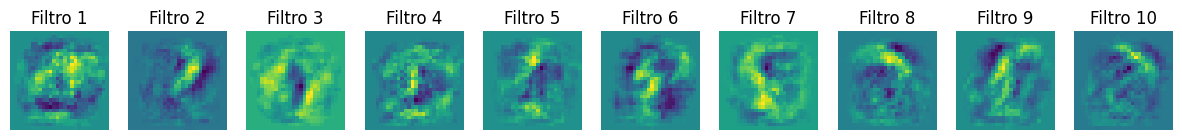

Dropout: 0.3 | L2: 0.0100 | Neuronas: 200
  Precisión entrenamiento final: 0.9347
  Precisión validación final:  0.9489
  Pérdida validación final:    0.3179
  Tiempo de entrenamiento:     23.33 segundos
--------------------------------------------------
Pesos forma: (784, 200) (entrada x neuronas)


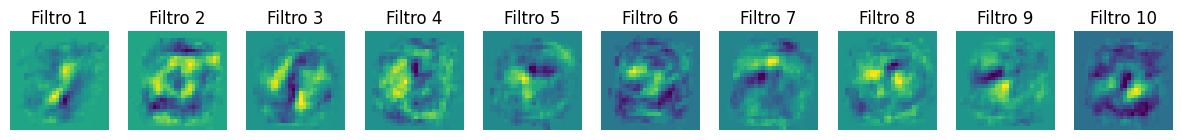

Dropout: 0.5 | L2: 0.0000 | Neuronas: 200
  Precisión entrenamiento final: 0.9611
  Precisión validación final:  0.9718
  Pérdida validación final:    0.0962
  Tiempo de entrenamiento:     16.77 segundos
--------------------------------------------------
Pesos forma: (784, 200) (entrada x neuronas)


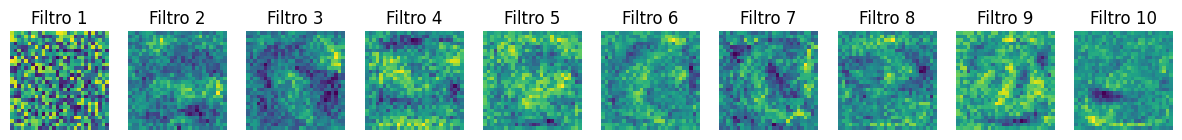

Dropout: 0.5 | L2: 0.0010 | Neuronas: 200
  Precisión entrenamiento final: 0.9499
  Precisión validación final:  0.9657
  Pérdida validación final:    0.1949
  Tiempo de entrenamiento:     26.27 segundos
--------------------------------------------------
Pesos forma: (784, 200) (entrada x neuronas)


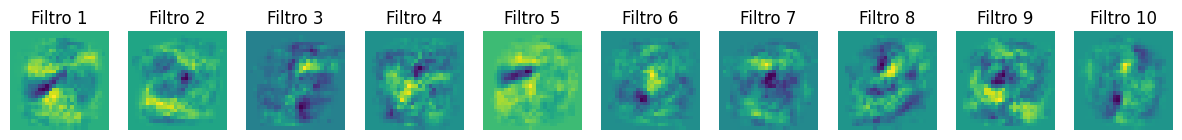

Dropout: 0.5 | L2: 0.0100 | Neuronas: 200
  Precisión entrenamiento final: 0.9207
  Precisión validación final:  0.9432
  Pérdida validación final:    0.3452
  Tiempo de entrenamiento:     37.28 segundos
--------------------------------------------------
Pesos forma: (784, 200) (entrada x neuronas)


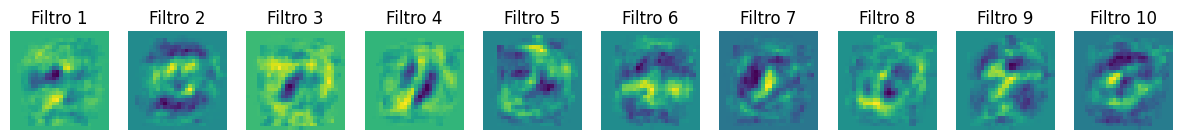

Dropout: 0.7 | L2: 0.0000 | Neuronas: 200
  Precisión entrenamiento final: 0.9381
  Precisión validación final:  0.9669
  Pérdida validación final:    0.1111
  Tiempo de entrenamiento:     15.79 segundos
--------------------------------------------------
Pesos forma: (784, 200) (entrada x neuronas)


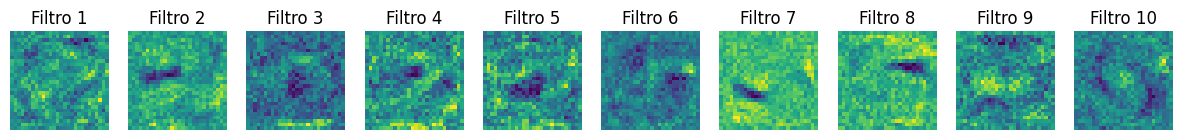

Dropout: 0.7 | L2: 0.0010 | Neuronas: 200
  Precisión entrenamiento final: 0.9251
  Precisión validación final:  0.9611
  Pérdida validación final:    0.2332
  Tiempo de entrenamiento:     18.05 segundos
--------------------------------------------------
Pesos forma: (784, 200) (entrada x neuronas)


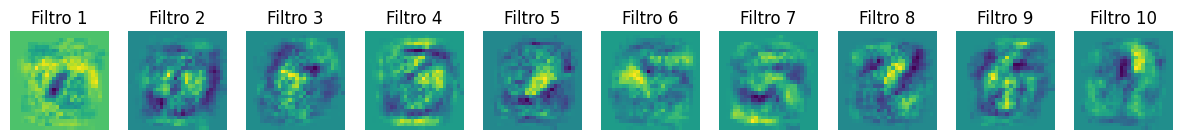

Dropout: 0.7 | L2: 0.0100 | Neuronas: 200
  Precisión entrenamiento final: 0.8924
  Precisión validación final:  0.9415
  Pérdida validación final:    0.3798
  Tiempo de entrenamiento:     21.76 segundos
--------------------------------------------------
Pesos forma: (784, 200) (entrada x neuronas)


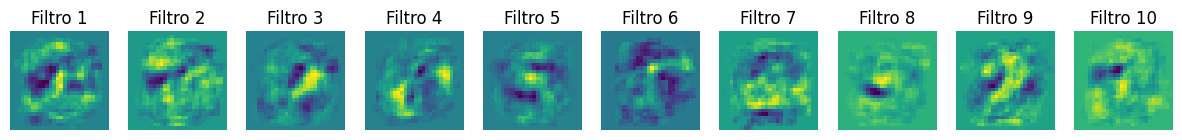

In [12]:
from tensorflow.keras import layers, regularizers

def entrenar_con_regularizacion(hidden_units=200, dropout_rate=0.5, l2_lambda=0.001):
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(hidden_units, activation='relu',
                     kernel_regularizer=regularizers.l2(l2_lambda)),
        layers.Dropout(dropout_rate),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    start = time.time()
    history = model.fit(X_entreno, y_entreno, epochs=5, batch_size=128,
                        validation_data=(X_prueba, y_prueba), verbose=0)
    end = time.time()
    
    val_acc = history.history['val_accuracy'][-1]
    val_loss = history.history['val_loss'][-1]
    train_acc = history.history['accuracy'][-1]

    print(f"Dropout: {dropout_rate} | L2: {l2_lambda:.4f} | Neuronas: {hidden_units}")
    print(f"  Precisión entrenamiento final: {train_acc:.4f}")
    print(f"  Precisión validación final:  {val_acc:.4f}")
    print(f"  Pérdida validación final:    {val_loss:.4f}")
    print(f"  Tiempo de entrenamiento:     {end - start:.2f} segundos")
    print("-" * 50)

    return history, model

histories_reg = []
etiquetas_reg = []

for dropout in [0.3, 0.5, 0.7]:
    for l2_lambda in [0.0, 0.001, 0.01]:
        hist, model = entrenar_con_regularizacion(
            hidden_units=200,
            dropout_rate=dropout,
            l2_lambda=l2_lambda
        )
        visualizar_filtros_primera_capa(model)
        label = f"D{dropout}-L2{l2_lambda}"
        histories_reg.append(hist)
        etiquetas_reg.append(label)


#### Impacto

- Dropout moderado (0.3 - 0.5) sin L2 mejora la precisión de validación, manteniendo la pérdida baja y evitando el sobreajuste. Por ejemplo, con dropout 0.3 y sin L2, la validación llega a 97.6% de precisión.

- Cuando se agrega L2 (0.001 o 0.01), la precisión tiende a bajar, y la pérdida aumenta, indicando un modelo más restringido que podría estar subajustando.

- Con dropout alto (0.7), la precisión y la pérdida empeoran, sugiriendo que un dropout demasiado fuerte reduce la capacidad de aprendizaje del modelo.

- El tiempo de entrenamiento varía, pero no sigue un patrón claro con el cambio de dropout o L2. A veces el dropout alto puede ralentizar el entrenamiento por la mayor variabilidad.

### 11. Visualización (5 puntos)
Cree gráficos que muestren:
- Evolución de la precisión y pérdida durante el entrenamiento
- Comparación de rendimiento entre diferentes configuraciones
- Visualización de algunos filtros o características aprendidas por la red

In [13]:
def graficar_history(history, etiqueta="Modelo"):
    # Precisión
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Validación')
    plt.title(f'Precisión durante entrenamiento - {etiqueta}')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.legend()

    # Pérdida
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Entrenamiento')
    plt.plot(history.history['val_loss'], label='Validación')
    plt.title(f'Pérdida durante entrenamiento - {etiqueta}')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.show()
    
def comparar_histories(histories, etiquetas):
    plt.figure(figsize=(12, 5))

    # Comparar precisión validación
    plt.subplot(1, 2, 1)
    for hist, etiq in zip(histories, etiquetas):
        plt.plot(hist.history['val_accuracy'], label=etiq)
    plt.title('Comparación de precisión de validación')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.legend()

    # Comparar pérdida validación
    plt.subplot(1, 2, 2)
    for hist, etiq in zip(histories, etiquetas):
        plt.plot(hist.history['val_loss'], label=etiq)
    plt.title('Comparación de pérdida de validación')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()

    plt.show()




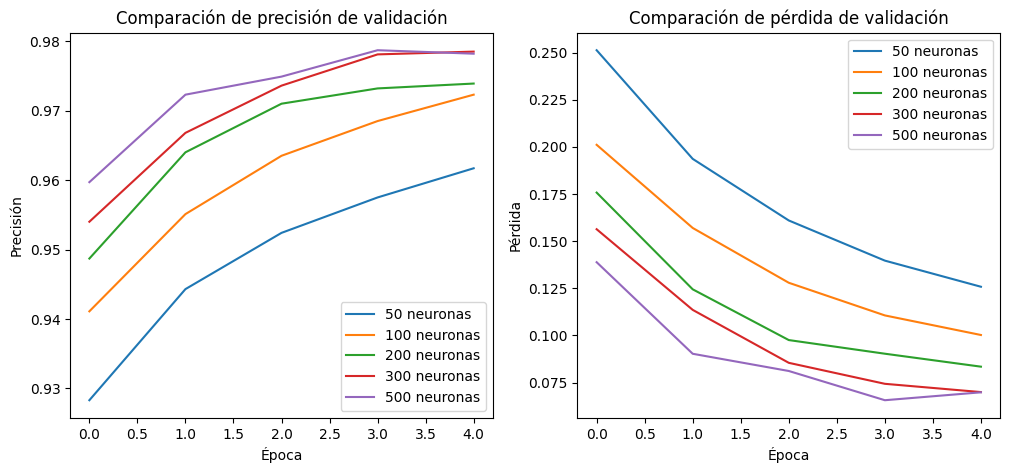

In [14]:
comparar_histories(histories, etiquetas)

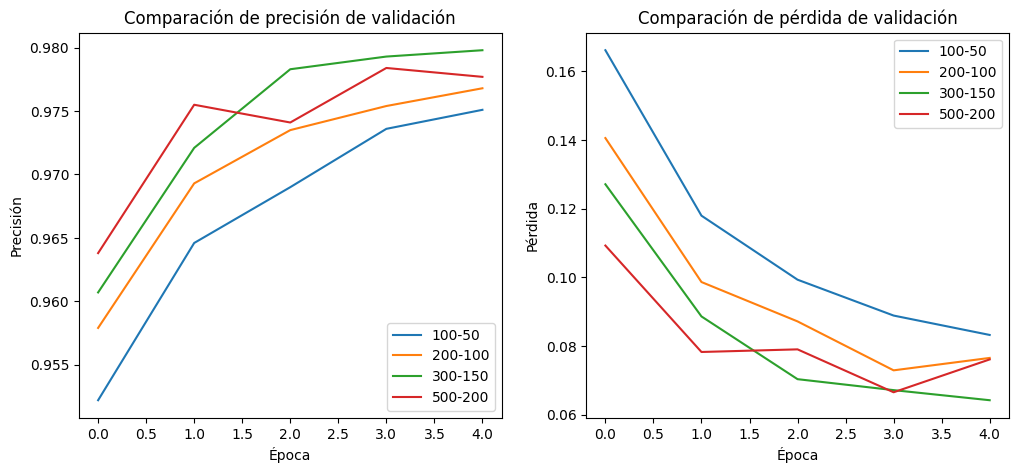

In [15]:
comparar_histories(histories_2c, etiquetas_2c)

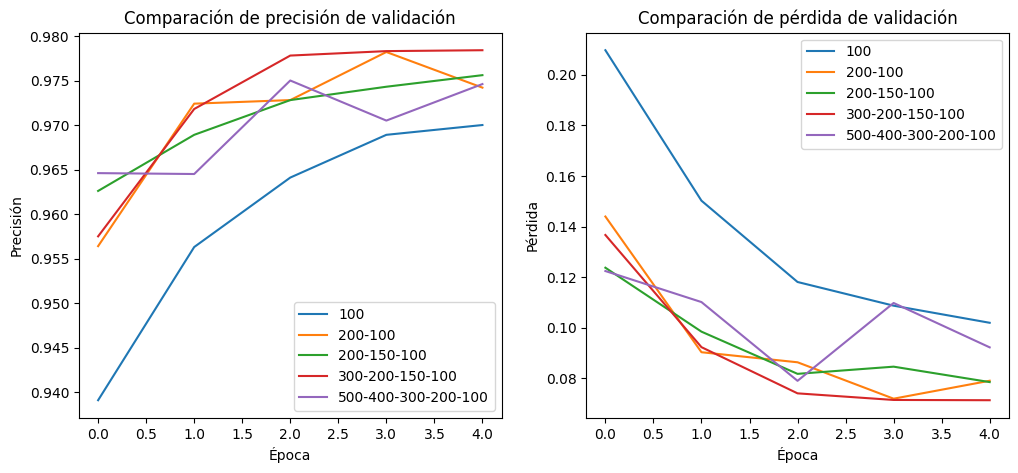

In [16]:
comparar_histories(histories_3deep, etiquetas_3deep)

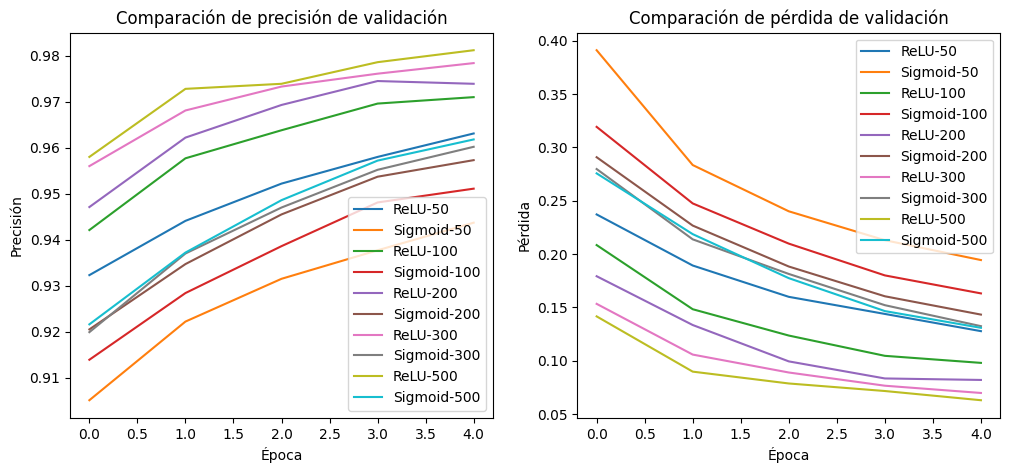

In [17]:
comparar_histories(histories_activacion, etiquetas_activacion)

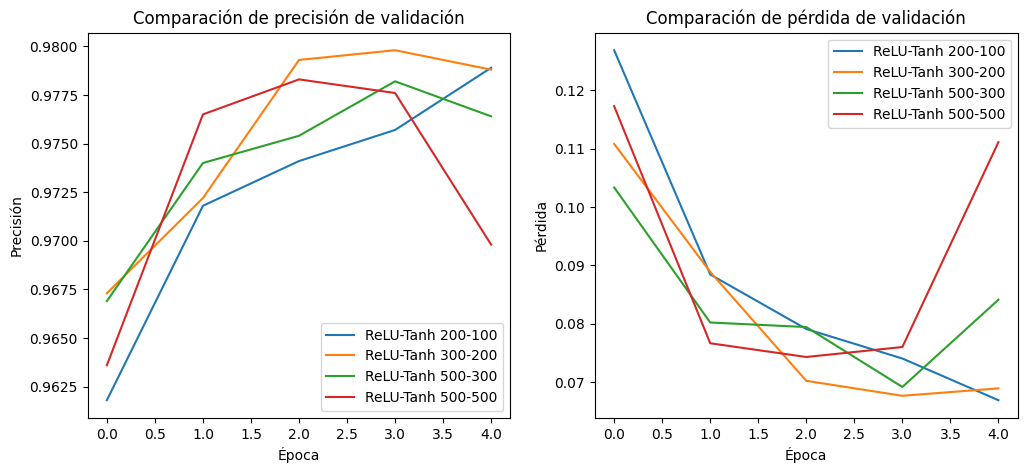

In [18]:
comparar_histories(histories_relu_tanh, etiquetas_relu_tanh)

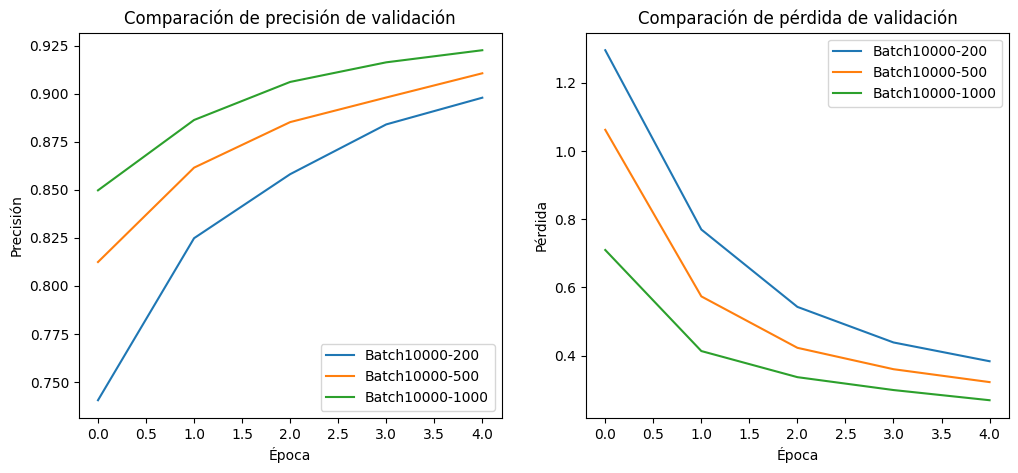

In [19]:
comparar_histories(histories_batch, etiquetas_batch)

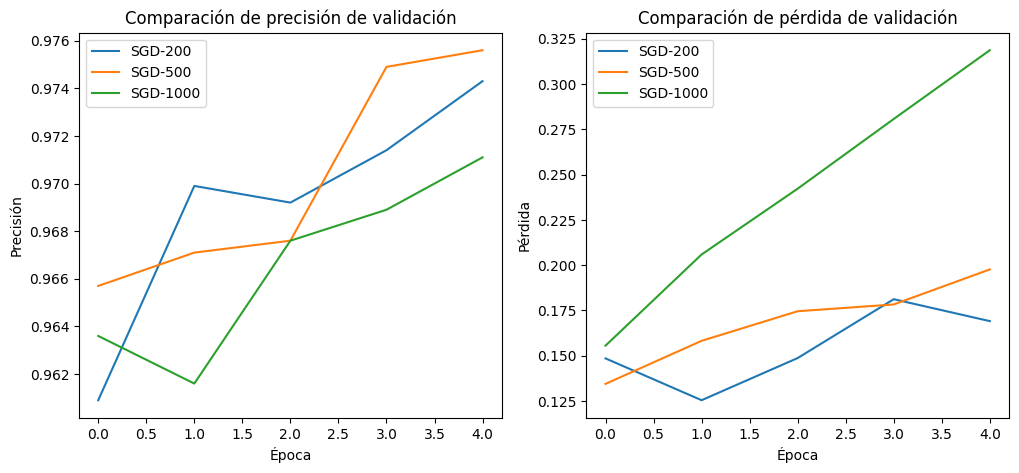

In [20]:
comparar_histories(histories_sgd, etiquetas_sgd)

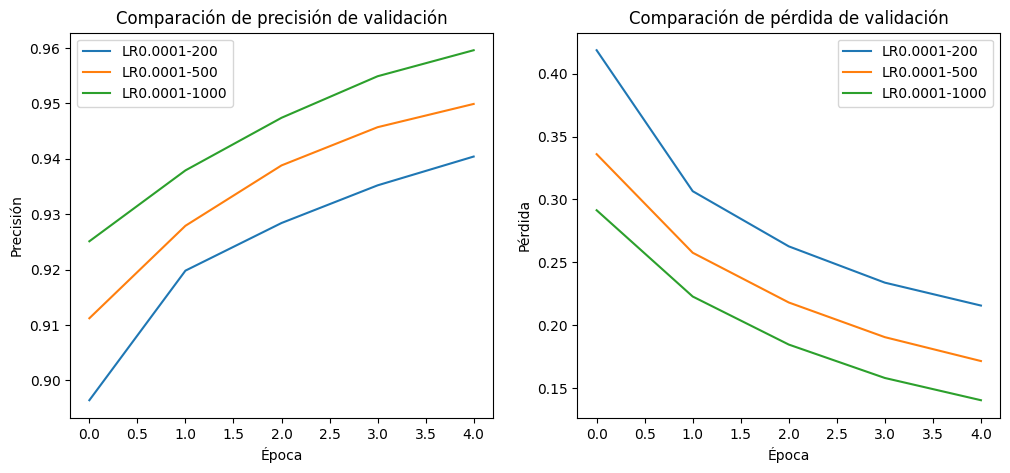

In [21]:
comparar_histories(histories_lr_bajo, etiquetas_lr_bajo)

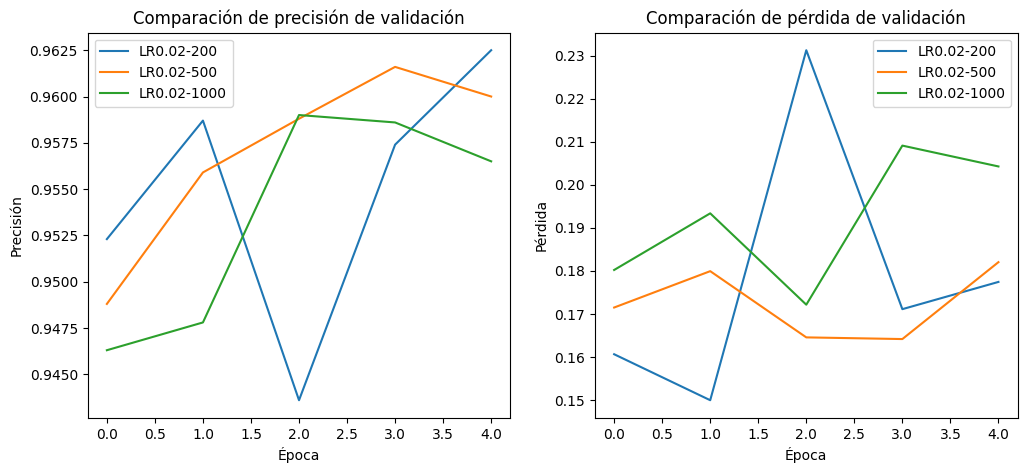

In [22]:
comparar_histories(histories_lr_alta, etiquetas_lr_alta)

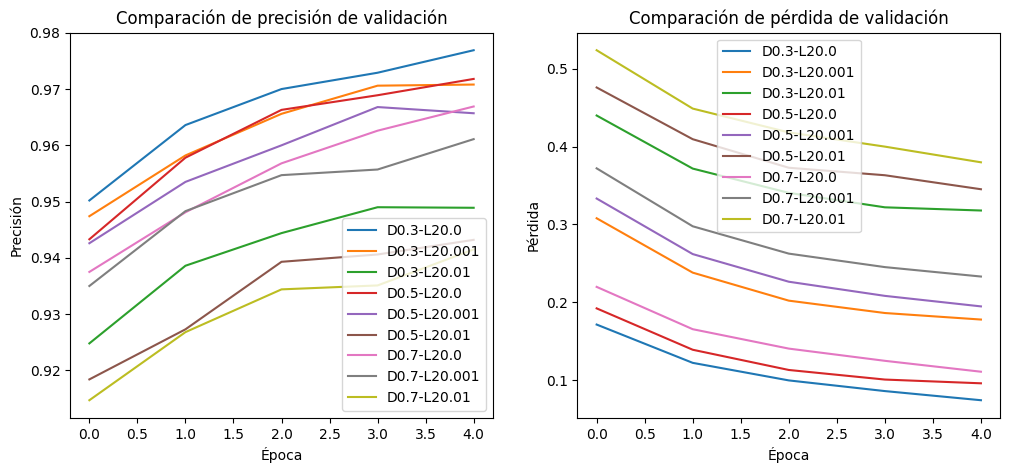

In [23]:
comparar_histories(histories_reg, etiquetas_reg)

### 12. Modelo Óptimo (14 puntos)
Combine todos los métodos anteriores para diseñar un modelo que:
- Alcance una precisión de validación de 98.5% o superior
- Optimice el tiempo de entrenamiento
- Presente la arquitectura más eficiente posible
- Justifique cada decisión de diseño